# LAB - 4

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from sklearn import datasets

In [2]:
W_exp = np.array([[1,2],[3,-2],[-1,2]]).T

In [3]:
x = np.linspace(0,100,100).reshape(-1,1)
print(x.shape)
ones = np.ones(100).reshape(-1,1)
print(ones.shape)
X = np.concatenate((x,ones),axis=1)
print(X.shape)

y_exp = np.matmul(X,W_exp)

(100, 1)
(100, 1)
(100, 2)


In [4]:
def err_fun(w):
    w1 = w.reshape(2,3)
    tmp = np.matmul(X,w1)
    out = np.sum((tmp - y_exp)**2).reshape(1,-1)
    return out

In [5]:
w_init = np.random.rand(W_exp.size).reshape(2,3)
res = minimize(fun = err_fun, x0 = w_init)
w_predicted = res.x.reshape(2,3)
print(w_predicted)

[[ 0.99999997  2.99999997 -1.00000003]
 [ 2.00000144 -1.99999856  2.00000144]]


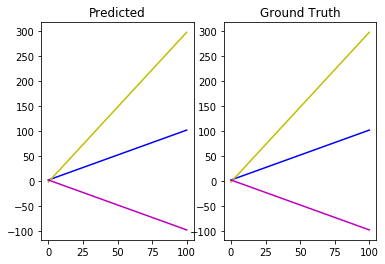

In [6]:
plt.subplot(121)
plt.title("Predicted")

plt.plot(x,y_exp[:,0],'b')
plt.plot(x,y_exp[:,1],'y')
plt.plot(x,y_exp[:,2],'m')

y_pred = np.matmul(X,w_predicted)

plt.subplot(122)
plt.title("Ground Truth")

plt.plot(x,y_pred[:,0],'b')
plt.plot(x,y_pred[:,1],'y')
plt.plot(x,y_pred[:,2],'m')

### Multivariate regression for k variate polynomial with degree d

In [30]:
#Setting up the dimension X = nxm; W = mxk; Y = nxK
n = 100
d = 6
m = d+1
k = 10

### Generating Matrix X for d degree polynomial

In [31]:
#Generating X matrix

x = np.linspace(0,100,100).reshape(-1,1)

def gen_Xmatrix(d):
    X = np.power(x,d)
    d-=1
    while(d>=1):
        d-=1
        temp = np.power(x,d)
        X = np.concatenate((X,temp),axis=1)
    ones = np.ones(100).reshape(-1,1)
    X = np.concatenate((X,ones),axis=1)
    return X

X = gen_Xmatrix(d)
print(X.shape)

(100, 7)


In [32]:
w_exp = np.random.rand(m*k).reshape(m,k)
print(w_exp.shape)

y_exp = np.matmul(X,w_exp)

print(y_exp.shape)

(7, 10)
(100, 10)


### Error function

In [57]:
def err_fun(w):
    w1 = w.reshape(m,k)
    tmp = np.matmul(X,w1)
    out = np.trace(np.matmul((tmp-y_exp).T,(tmp-y_exp)))
    return out

In [58]:
w_init = np.random.rand(w_exp.size)
res = minimize(fun = err_fun, x0 = w_init)

In [59]:
w_pred = res.x.reshape(m,k)

In [60]:
y_pred = np.matmul(X,w_pred)
print(y_pred.shape)

(100, 10)


### Function to plot graph of k variate regression

In [61]:
def fun_plot(k,y):
    for i in range(k):
        plt.plot(x,y[:,i],label="feature %d" % (i+1))
    plt.legend(loc='upper left')

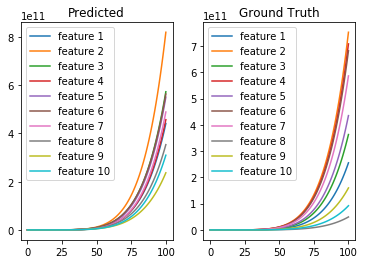

In [62]:
plt.subplot(121)
plt.title("Predicted")
fun_plot(k,y_pred)
plt.subplot(122)
plt.title("Ground Truth")
fun_plot(k,y_exp)


In [65]:
digits = datasets.load_digits()

data = digits.data
print(data.shape)

parts = np.hsplit(data,4)

X = np.hstack((parts[0],parts[1]))
X = np.hstack((X,parts[2]))

Y = parts[3]

print(X.shape)
print(Y.shape)

(1797, 64)
(1797, 48)
(1797, 16)


In [67]:
alpha = 0.0000001
n_iter = 5000
w_init = np.random.rand(48,16)
w_old = w_init
for i in range(n_iter):
    pred = np.matmul(X,w_old)
    grad = 2*np.matmul(X.T, (pred-Y))
    w_old = w_old - (alpha*grad)


In [69]:
y_predicted = np.matmul(X,w_old)
print(y_predicted.shape)

(1797, 16)


In [ ]:
%matplotlib inline
data_gen = np.hstack((X,abs(y_predicted)))

index = 41
print("Original Image:")
image_org = data[index].reshape((8,8))
plt.imshow(image_org)
plt.show()
print("Generated Image")
image_gen = data_gen[index].reshape((8,8))
plt.imshow(image_gen)
plt.show()

In [ ]:
Difference = image_org - image_gen
res1 = np.count_nonzero(Difference)

In [75]:
faces = datasets.fetch_olivetti_faces()

data = faces.data
print(data.shape)

parts = np.hsplit(data,4)

X = np.hstack((parts[0],parts[1]))
X = np.hstack((X,parts[2]))

Y = parts[3]

print(X.shape)
print(Y.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/iit-4/scikit_learn_data
(400, 4096)
(400, 3072)
(400, 1024)


In [77]:
alpha = 0.0000001
n_iter = 5000
w_init = np.random.rand(3072,1024)
w_old = w_init
for i in range(n_iter):
    pred = np.matmul(X,w_old)
    grad = 2*np.matmul(X.T, (pred-Y))
    w_old = w_old - (alpha*grad)


In [90]:
def err_fun1(w):
    w1 = w.reshape(3072,1024)
    tmp = np.matmul(X,w1)
    out = np.trace(np.matmul((tmp-Y).T,(tmp-Y)))
    return out

In [ ]:
res = minimize(fun=err_fun1,x0=w_init)

In [78]:
y_predicted = np.matmul(X,w_old)
print(y_predicted.shape)

(400, 1024)


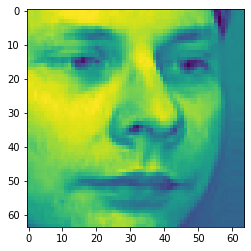

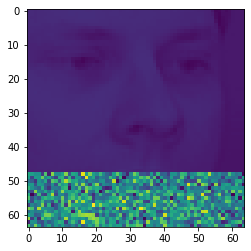

In [84]:
%matplotlib inline
data_gen = np.hstack((X,abs(y_predicted)))

index = 39

image_org = data[index].reshape((64,64))
plt.imshow(image_org)
plt.show()
image_gen = data_gen[index].reshape((64,64))
plt.imshow(image_gen)
plt.show()